In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.style.use("ggplot")

In [8]:
%matplotlib notebook

# TMDB movies dataset

In [52]:
movies = pd.read_csv("tmdbMovies.csv")

In [53]:
movies.shape

(7077, 11)

In [54]:
movies.head()

,id,title,release_date,overview,vote_average,vote_count,popularity,adult,original_language,poster_url,genres
0,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",8.8,2224,27.651,False,hi,/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,"Comedy, Drama, Romance"
1,278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,8.7,15441,62.039,False,en,/9O7gLzmreU0nGkIB6K3BsJbzvNv.jpg,"Drama, Crime"
2,238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",8.7,11722,44.224,False,en,/d4KNaTrltq6bpkFS01pYtyXa09m.jpg,"Drama, Crime"
3,424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,8.6,9332,32.135,False,en,/yPisjyLweCl1tbgwgtzBCNCBle.jpg,"Drama, History, War"
4,240,The Godfather: Part II,1974-12-20,In the continuing saga of the Corleone crime f...,8.5,6892,26.892,False,en,/bVq65huQ8vHDd1a4Z37QtuyEvpA.jpg,"Crime, Drama"


In [56]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077 entries, 0 to 7076
Data columns (total 11 columns):
id                   7077 non-null int64
title                7077 non-null object
release_date         7077 non-null object
overview             7066 non-null object
vote_average         7077 non-null float64
vote_count           7077 non-null int64
popularity           7077 non-null float64
adult                7077 non-null bool
original_language    7077 non-null object
poster_url           7022 non-null object
genres               7071 non-null object
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 559.9+ KB


In [57]:
movies.drop(columns = {"poster_url"}, inplace =True)

In [58]:
movies.drop(columns = {"overview"}, inplace =True)

In [59]:
movies["vote_count"].mean()

1437.1701285855588

In [60]:
english = movies[movies["original_language"]=="en"][["title","release_date","vote_average","vote_count","popularity","genres"]]

In [61]:
english.shape

(5840, 6)

In [93]:
english.head()

,title,release_date,vote_average,vote_count,popularity,genres
1,The Shawshank Redemption,1994-09-23,8.7,15441,62.039,"Drama, Crime"
2,The Godfather,1972-03-14,8.7,11722,44.224,"Drama, Crime"
3,Schindler's List,1993-11-30,8.6,9332,32.135,"Drama, History, War"
4,The Godfather: Part II,1974-12-20,8.5,6892,26.892,"Crime, Drama"
10,The Green Mile,1999-12-10,8.5,9704,28.354,"Crime, Drama, Fantasy"


In [94]:
english["popularity"].mean()

16.51812534246572

In [95]:
english["vote_count"].mean()

1620.7532534246575

In [96]:
english["vote_average"].mean()

6.465308219178047

In [97]:
e_p = english[english["vote_average"]>= 8 ]
e_p= e_p[e_p["vote_count"]>10000]

In [98]:
e_p.sort_values("vote_average", ascending=False).head()

,title,release_date,vote_average,vote_count,popularity,genres
1,The Shawshank Redemption,1994-09-23,8.7,15441,62.039,"Drama, Crime"
2,The Godfather,1972-03-14,8.7,11722,44.224,"Drama, Crime"
11,Pulp Fiction,1994-09-10,8.5,17942,47.259,"Thriller, Crime"
14,Forrest Gump,1994-07-06,8.4,17290,30.328,"Comedy, Drama, Romance"
16,The Lord of the Rings: The Return of the King,2003-12-01,8.4,14949,76.870,"Action, Adventure, Fantasy"


In [99]:
e_p.shape

(34, 6)

In [100]:
%matplotlib notebook

In [101]:
lis = list(e_p["title"][0:15])

## The Most popular English Movies of all time 

In [102]:
print("The top 15 most poular english movies of all tome are(in no particular order):\n")
for i in range(len(lis)):
    print(lis[i])

The top 15 most poular english movies of all tome are(in no particular order):

The Shawshank Redemption
The Godfather
Pulp Fiction
Forrest Gump
The Lord of the Rings: The Return of the King
The Dark Knight
Fight Club
The Empire Strikes Back
The Lord of the Rings: The Fellowship of the Ring
Se7en
Inception
The Lord of the Rings: The Two Towers
Avengers: Endgame
Interstellar
Avengers: Infinity War


In [103]:
movies.columns

Index(['id', 'title', 'release_date', 'overview', 'vote_average', 'vote_count',
       'popularity', 'adult', 'original_language', 'poster_url', 'genres'],
      dtype='object')

In [104]:
movies["genres"].unique()

array(['Comedy, Drama, Romance', 'Drama, Crime', 'Drama, History, War',
       ..., 'Crime, Mystery, Science Fiction, Thriller',
       'Adventure, Thriller',
       'Adventure, Comedy, Science Fiction, Family, TV Movie'],
      dtype=object)

In [105]:
import numpy as np

In [106]:
english["genres"].replace(np.nan,"non-recognized", inplace =True)

In [107]:
scifi_english = english

In [108]:
scifi_english["genres"].values[0]

'Drama, Crime'

In [109]:
scifi = []
len(scifi)

0

In [110]:
def detect_scifi(s):
    if "Science Fiction" in s:
        scifi.append(1)
    else:
        scifi.append(0)    

In [111]:
for i in range(5840):
    detect_scifi(scifi_english["genres"].values[i])

In [112]:
len(scifi)

5840

In [113]:
scifi_english["scienceFiction"] = np.array(scifi)

In [114]:
scifi_english["scienceFiction"].value_counts()

0    5063
1     777
Name: scienceFiction, dtype: int64

In [115]:
scifi_english = scifi_english[scifi_english["scienceFiction"]==1]

In [116]:
scifi_english.shape

(777, 7)

In [117]:
scifi_english = scifi_english[scifi_english["vote_count"]>=12000]

In [118]:
scifi_english.shape

(31, 7)

In [119]:
scifi_english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 61 to 5615
Data columns (total 7 columns):
title             31 non-null object
release_date      31 non-null object
vote_average      31 non-null float64
vote_count        31 non-null int64
popularity        31 non-null float64
genres            31 non-null object
scienceFiction    31 non-null int32
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 1.8+ KB


In [120]:
scifi_english.sort_values("vote_average",ascending = False, inplace =True)

## The most popular English Sci-Fi movies of all time 

In [121]:
print("The top 20 most poular english Science Fiction movies of all time are(in no particular order):\n")
for i in range(20):
    print(scifi_english["title"].values[i])

The top 20 most poular english Science Fiction movies of all time are(in no particular order):

Inception
Avengers: Endgame
Interstellar
Avengers: Infinity War
Back to the Future
Star Wars
The Matrix
WALL·E
Guardians of the Galaxy
Logan
Captain America: The Winter Soldier
The Martian
The Avengers
Guardians of the Galaxy Vol. 2
Iron Man
Mad Max: Fury Road
The Hunger Games: Catching Fire
Avatar
Star Wars: The Force Awakens
Spider-Man: Homecoming


In [62]:
def horror_movie(s):
    if "Horror" in s:
        return 1
    else:
        return 0

In [104]:
eng_horr= english

In [105]:
english["genres"].replace(np.nan,"Unnamned", inplace =True)

In [106]:
eng_horr["isHorror"] = english["genres"].apply(horror_movie)

In [107]:
eng_horr = eng_horr[eng_horr["isHorror"]==1]

In [108]:
eng_horr = eng_horr.sort_values("popularity", ascending =False)

In [109]:
eng_horr["vote_count"].mean()

1154.73390036452

In [110]:
eng_horr= eng_horr[eng_horr["vote_count"]>3004]

In [111]:
eng_horr = eng_horr.sort_values("vote_count", ascending =False)

In [112]:
eng_horr = eng_horr[eng_horr["vote_average"]>6.7]
eng_horr.head()

,title,release_date,vote_average,vote_count,popularity,genres,isHorror
1651,It,2017-09-06,7.2,13041,19.160,Horror,1
1494,Split,2016-09-26,7.3,11932,31.627,"Horror, Thriller",1
877,Get Out,2017-02-24,7.5,10475,31.515,"Horror, Mystery, Thriller",1
104,The Shining,1980-05-23,8.2,10459,28.577,"Horror, Thriller",1
1860,I Am Legend,2007-12-14,7.1,10259,23.832,"Action, Drama, Horror, Science Fiction, Thriller",1


In [113]:
eng_horr.shape

(37, 7)

## Most popular English Horror Movies 

In [114]:
print("The 30 most popular English Horror movies of all time are:\n")
for i in range(30):
    print(eng_horr["title"].values[i])

The 30 most popular English Horror movies of all time are:

It
Split
Get Out
The Shining
I Am Legend
The Silence of the Lambs
Black Swan
Alien
Zombieland
A Quiet Place
The Conjuring
Psycho
Jaws
Saw
Shaun of the Dead
American Psycho
10 Cloverfield Lane
The Conjuring 2
The Exorcist
Don't Breathe
mother!
Insidious
Sleepy Hollow
Gremlins
28 Days Later
Constantine
The Others
Sweeney Todd: The Demon Barber of Fleet Street
The Thing
Us


In [24]:
english.head()

,title,release_date,vote_average,vote_count,popularity,genres
1,The Shawshank Redemption,1994-09-23,8.7,15441,62.039,"Drama, Crime"
2,The Godfather,1972-03-14,8.7,11722,44.224,"Drama, Crime"
3,Schindler's List,1993-11-30,8.6,9332,32.135,"Drama, History, War"
4,The Godfather: Part II,1974-12-20,8.5,6892,26.892,"Crime, Drama"
10,The Green Mile,1999-12-10,8.5,9704,28.354,"Crime, Drama, Fantasy"


In [25]:
def only_2019(s):
    if "2019" in s:
        return 1
    else:
        return 0

In [75]:
english_2019 = english

In [76]:
english_2019["2019"] = english_2019["release_date"].apply(only_2019)

In [77]:
english_2019["2019"].value_counts()

0    5654
1     186
Name: 2019, dtype: int64

In [78]:
english_2019 = english_2019[english_2019["2019"]==1]

In [79]:
english_2019.shape

(186, 7)

In [80]:
english_2019.head()

,title,release_date,vote_average,vote_count,popularity,genres,2019
50,Klaus,2019-11-08,8.3,1516,25.088,"Adventure, Animation, Comedy, Family",1
73,Avengers: Endgame,2019-04-24,8.3,12095,59.678,"Action, Adventure, Science Fiction",1
98,Joker,2019-10-02,8.2,10739,114.251,"Crime, Thriller, Drama",1
135,Just Mercy,2019-12-25,8.1,385,83.629,Drama,1
141,Jojo Rabbit,2019-10-18,8.1,2788,57.885,"Comedy, Drama, War",1


In [81]:
english_2019.sort_values("popularity", ascending = False, inplace=True)

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
english_2019  = english_2019[english_2019["vote_average"]>7]

In [83]:
english_2019.shape

(53, 7)

In [85]:
english_2019  = english_2019[english_2019["vote_count"]>1000]

In [87]:
english_2019.shape

(27, 7)

## Most popular Hollywood Movies of 2019 

In [90]:
print("The 15 best hollywood movies of 2019 are(in no particular order):\n")
for i in range(15):
    print(english_2019["title"].values[i])

The 15 best hollywood movies of 2019 are(in no particular order):

The Lion King
Joker
1917
Little Women
Frozen II
Knives Out
Spider-Man: Far from Home
Maleficent: Mistress of Evil
John Wick: Chapter 3 - Parabellum
Once Upon a Time… in Hollywood
Avengers: Endgame
Ford v Ferrari
Jojo Rabbit
The Lighthouse
Doctor Sleep


In [15]:
movies["genres"].unique()

array(['Comedy, Drama, Romance', 'Drama, Crime', 'Drama, History, War',
       ..., 'Crime, Mystery, Science Fiction, Thriller',
       'Adventure, Thriller',
       'Adventure, Comedy, Science Fiction, Family, TV Movie'],
      dtype=object)

In [14]:
#Popular genres: Comedy, Horror, Crime/Thriller,Science Fiction,Action, Romance

In [57]:
def comedy(s):
    if "Comedy" in s:
        return 1
    else:
        return 0
    
def horror(s):
    if "Horror" in s:
        return 1
    else:
        return 0 
def crime_thriller(s):
    if "Crime" in s:
        return 1
    elif "Thriller" in s:
        return 1
    else:
        return 0
def sf(s):
    if "Science Fiction" in s:
        return 1
    else:
        return 0
def action(s):
    if "Action" in s:
        return 1
    else:
        return 0   
def romance(s):
    if "Romance" in s:
        return 1
    else:
        return 0    
    

In [39]:
def release(s):
    return int(s[0:3] + '0')

In [64]:
import numpy as np

In [30]:
movies["genres"].replace(np.nan,"Unnamed", inplace = True)

In [31]:
com = movies

In [33]:
com["is"] = com["genres"].apply(comedy)

In [37]:
com['is'].value_counts()
com = com[com["is"]==1]

In [40]:
com = com[["release_date","popularity","genres"]]
com.head()

,release_date,popularity,genres
0,1995-10-20,27.651,"Comedy, Drama, Romance"
5,2019-05-30,103.853,"Comedy, Drama, Thriller"
7,1974-12-21,7.829,"Comedy, Drama"
12,2019-12-26,19.189,Comedy
13,1997-12-20,22.041,"Comedy, Drama"


In [41]:
com.shape

(2665, 3)

In [42]:
com["release_date"] = com["release_date"].apply(release)

In [46]:
com.drop(columns= {"genres"}, inplace =True)

In [47]:
com.groupby("release_date").mean()

,popularity
release_date,
1920,12.009000
1930,14.992111
1940,10.723889
1950,11.250913
1960,12.140820
1970,12.308243
1980,13.468305
1990,13.435520
2000,13.500417


In [49]:
hor = movies
hor["is"] = hor["genres"].apply(horror)
hor = hor[hor["is"]==1]
hor = hor[["release_date","popularity","genres"]]
hor["release_date"] = hor["release_date"].apply(release)



In [60]:
hor.shape

(911, 3)

In [58]:
cr = movies
cr["is"] = cr["genres"].apply(crime_thriller)
cr = cr[cr["is"]==1]
cr = cr[["release_date","popularity","genres"]]
cr["release_date"] = cr["release_date"].apply(release)

In [59]:
cr.shape

(2374, 3)

In [61]:
scf = movies
scf["is"] = scf["genres"].apply(sf)
scf = scf[scf["is"]==1]
scf = scf[["release_date","popularity","genres"]]
scf["release_date"] = scf["release_date"].apply(release)

In [62]:
scf.shape

(857, 3)

In [63]:
ac = movies
ac["is"] = ac["genres"].apply(action)
ac = ac[ac["is"]==1]
ac = ac[["release_date","popularity","genres"]]
ac["release_date"] = ac["release_date"].apply(release)

In [65]:
ac.shape

(1641, 3)

In [66]:
ro = movies
ro["is"] = ro["genres"].apply(romance)
ro = ro[ro["is"]==1]
ro = ro[["release_date","popularity","genres"]]
ro["release_date"] = ro["release_date"].apply(release)

In [67]:
ro.shape

(1173, 3)

## The popularity of different genres of movies compared over time. 

<IPython.core.display.Javascript object>


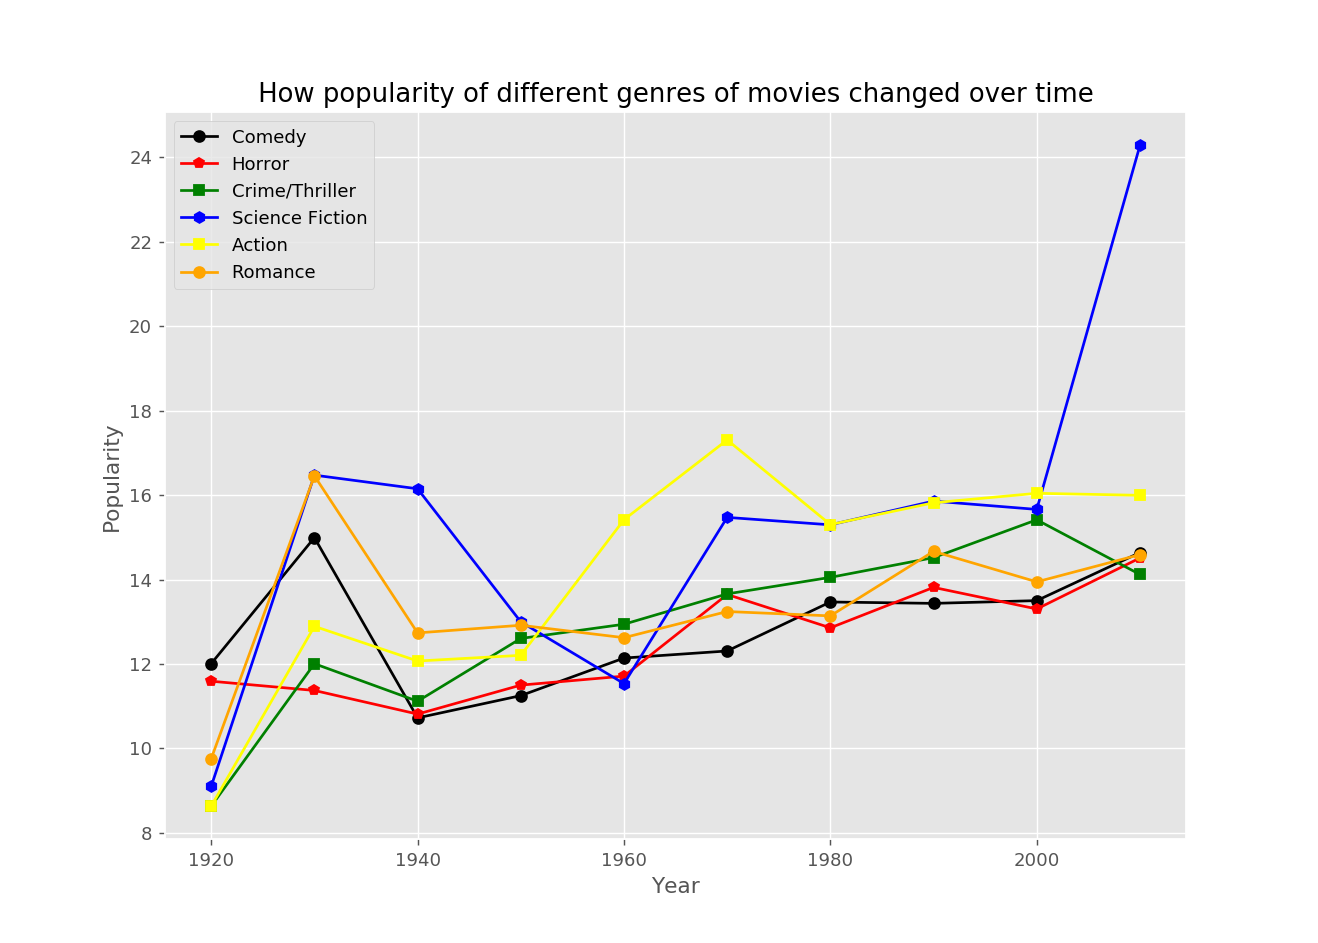

Text(0.5,1,' How popularity of different genres of movies changed over time ')

In [102]:
plt.plot(com.groupby("release_date").mean().index[:10], com.groupby("release_date").mean().values[:10], color ="k", marker = "o", label ="Comedy")
plt.plot(com.groupby("release_date").mean().index[:10], hor.groupby("release_date").mean().values[:10], color = "red", marker ='p', label = "Horror")
plt.plot(com.groupby("release_date").mean().index[:10], cr.groupby("release_date").mean().values[:10], color = "green", marker ='s', label = "Crime/Thriller")
plt.plot(com.groupby("release_date").mean().index[:10], scf.groupby("release_date").mean().values[:10], color = "blue", marker = 'h', label = "Science Fiction")
plt.plot(com.groupby("release_date").mean().index[:10], ac.groupby("release_date").mean().values[:10], color = "yellow", marker = "s", label = "Action")
plt.plot(com.groupby("release_date").mean().index[:10], ro.groupby("release_date").mean().values[:10], color = "orange",marker = "o", label = "Romance")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.title(" How popularity of different genres of movies changed over time ")

# TMDB people database 

In [9]:
pe = pd.read_csv("tmdbPeople.csv")

In [42]:
pe["department"].value_counts()

Acting               9085
Directing             395
Writing               350
Production             71
Sound                  24
Costume & Make-Up      14
Editing                13
Camera                 12
Art                    10
Creator                 9
Visual Effects          7
Crew                    7
Lighting                3
Name: department, dtype: int64

In [16]:
actors = pe[pe["department"]=="Acting"]

In [17]:
actors.shape

(9085, 8)

In [18]:
actors = actors.sort_values("popularity", ascending =False)

In [30]:
c = ["red","green","blue", "yellow","pink"]

In [29]:
import random

<IPython.core.display.Javascript object>


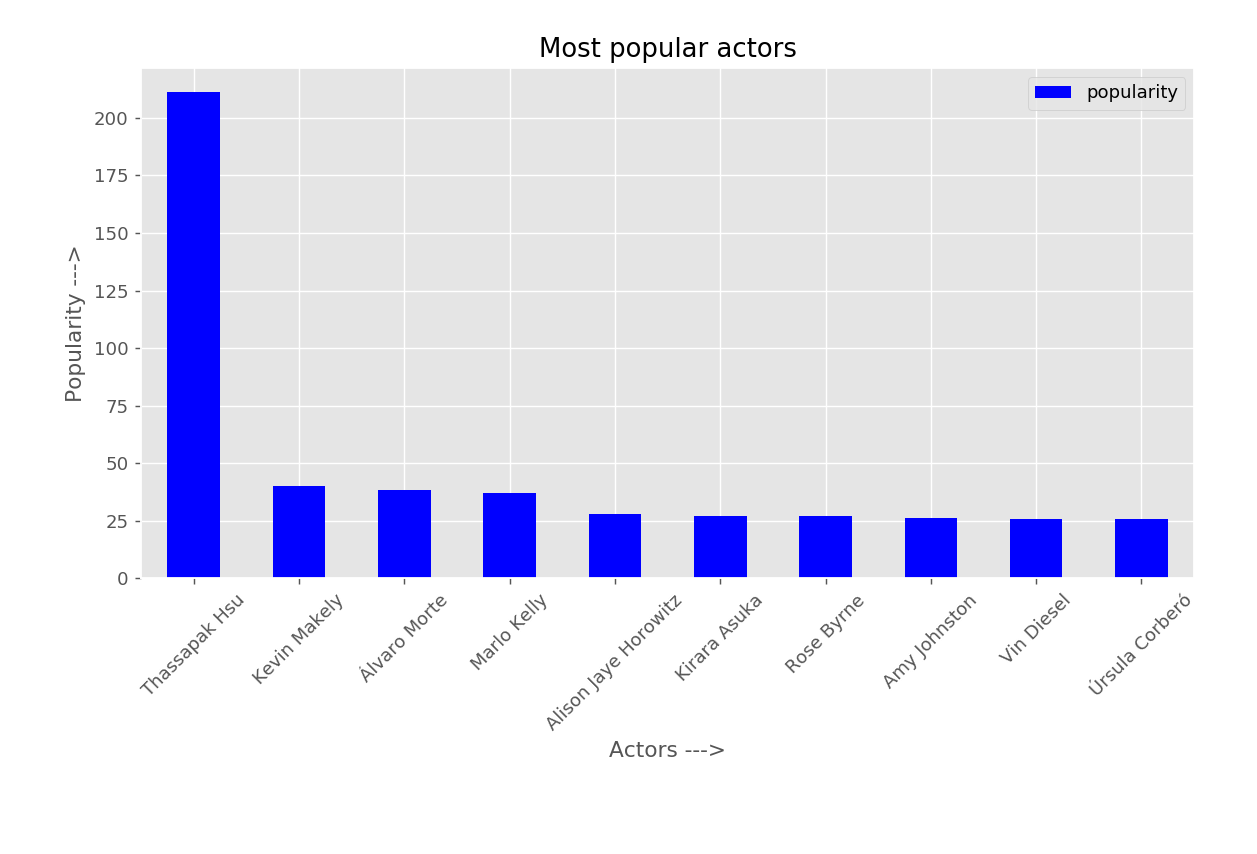

In [40]:
actors.head(10)[["name","popularity"]].set_index("name").plot(kind = "bar", color = ["blue"])
plt.ylabel("Popularity --->")
plt.xlabel("Actors --->")
plt.title("Most popular actors")
plt.xticks(rotation = 45)
plt.tight_layout()

In [41]:
directors = pe[pe["department"]=="Directing"]
directors.shape

(395, 8)

In [44]:
directors = directors.sort_values("popularity",ascending =False)


<IPython.core.display.Javascript object>


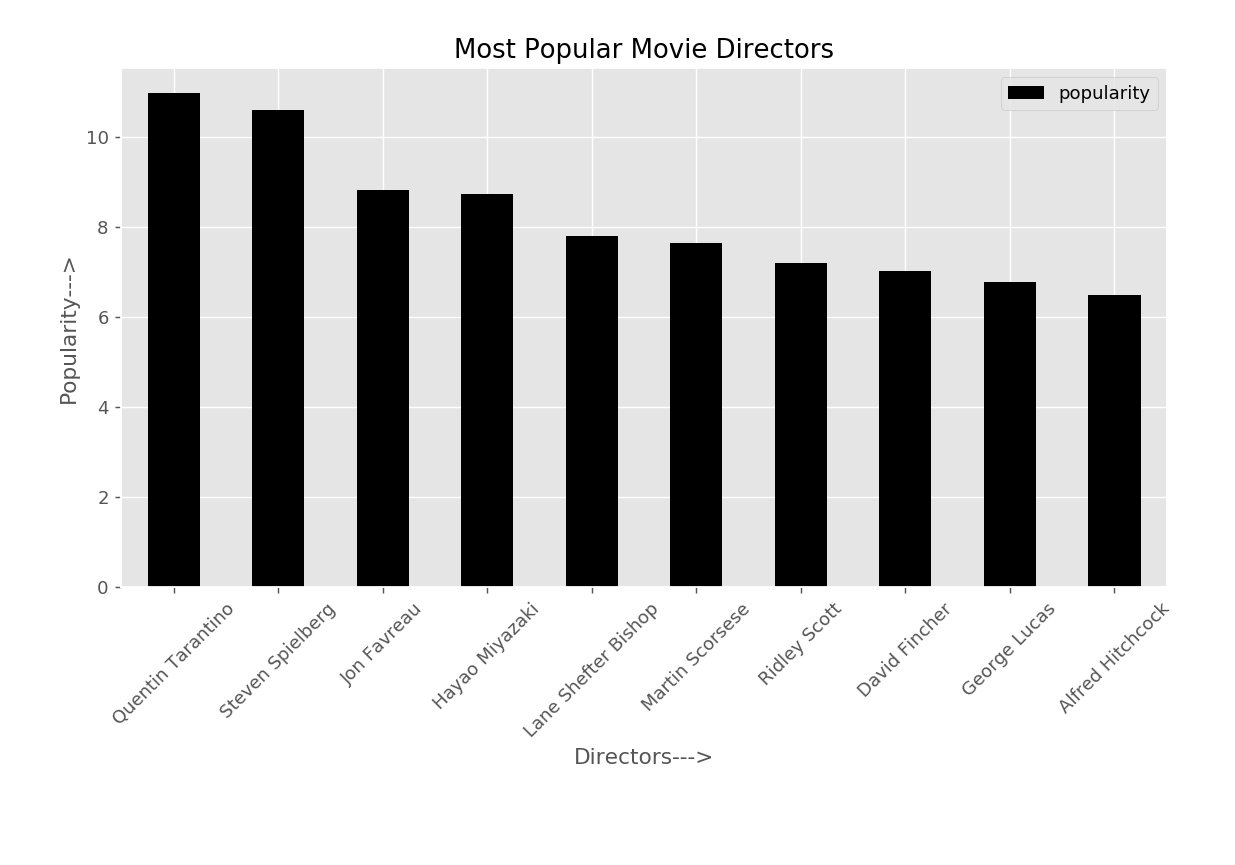

In [50]:
directors.head(10)[["name","popularity"]].set_index("name").plot(kind = "bar", color = "k")
plt.xlabel("Directors--->")
plt.ylabel("Popularity--->")
plt.title("Most Popular Movie Directors")
plt.xticks(rotation =45)
plt.tight_layout()